In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [211]:
df1=pd.read_csv('absortion.csv')
#df1

In [212]:
df2 = pd.read_csv('absorption.txt')
#df2

In [213]:
df= pd.concat([df1, df2], axis=1)
df.drop('target', axis=1, inplace=True)

In [214]:
category=[]
for i in range(len(df)):
    value_check=df["peak"][i]

    if value_check>=539:
        category.append("1")
    else:
        category.append("0")
df["cat"]=category
df

,id,sequence,name,sequence,peak,is_train,m,cat
0,sequence_40826,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,parent,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,539,True,0,1
1,sequence_40787,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122A,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,True,1,0
2,sequence_40789,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122G,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,True,1,0
3,sequence_40794,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122R,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,519,True,1,0
4,sequence_40806,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,V126A,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,525,True,1,0
...,...,...,...,...,...,...,...,...
76,sequence_40795,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,T125C/W222M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,562,True,2,1
77,sequence_40866,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,D121E/T125C/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,620,False,3,1
78,sequence_40799,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,T125C/F185T/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,597,False,3,1
79,sequence_40788,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122G/T125C/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,False,3,0


In [215]:
df["cat"].value_counts()

cat
0    50
1    31
Name: count, dtype: int64

In [216]:
df_positive=df.loc[df["cat"]=="1"]
df_negative=df.loc[df["cat"]=="0"]
df_positive=df_positive.sort_values(by="peak",ascending=True)
df_negative=df_negative.sort_values(by="peak",ascending=True)
df_negative.reset_index(drop=True)
df_positive.reset_index(drop=True)

,id,sequence,name,sequence,peak,is_train,m,cat
0,sequence_40826,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,parent,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,539,True,0,1
1,sequence_40820,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W222L,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,1
2,sequence_40837,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,F185W,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,1
3,sequence_40808,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,V126M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,1
4,sequence_40836,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,F185T,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,1
5,sequence_40859,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,I159S,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,1
6,sequence_40834,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,P226V,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,546,True,1,1
7,sequence_40823,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,P226I,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,546,True,1,1
8,sequence_40862,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,L129W,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,546,True,1,1
9,sequence_40833,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,D253T,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,549,True,1,1


In [217]:
#df_negative

In [218]:
df_positive

,id,sequence,name,sequence,peak,is_train,m,cat
0,sequence_40826,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,parent,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,539,True,0,1
62,sequence_40820,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W222L,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,1
61,sequence_40837,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,F185W,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,1
56,sequence_40808,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,V126M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,1
60,sequence_40836,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,F185T,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,1
59,sequence_40859,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,I159S,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,1
66,sequence_40834,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,P226V,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,546,True,1,1
65,sequence_40823,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,P226I,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,546,True,1,1
58,sequence_40862,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,L129W,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,546,True,1,1
68,sequence_40833,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,D253T,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,549,True,1,1


In [219]:
def extract_mutation_info(name):
    matches = re.findall(r'([A-Z])(\d+)([A-Z]+)', name)
    if matches:
        origins, positions, mutations = [], [], []
        for match in matches:
            origin, position, mutation = match
            origins.append(origin)
            positions.append(int(position))
            mutations.append(mutation)
        return origins, positions, mutations
    else:
        return None, None, None

In [220]:
df['origin'], df['position'], df['mutation'] = zip(*df['name'].apply(extract_mutation_info))

In [221]:
df

,id,sequence,name,sequence,peak,is_train,m,cat,origin,position,mutation
0,sequence_40826,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,parent,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,539,True,0,1,None,None,None
1,sequence_40787,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122A,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,True,1,0,[W],[122],[A]
2,sequence_40789,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122G,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,True,1,0,[W],[122],[G]
3,sequence_40794,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122R,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,519,True,1,0,[W],[122],[R]
4,sequence_40806,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,V126A,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,525,True,1,0,[V],[126],[A]
...,...,...,...,...,...,...,...,...,...,...,...
76,sequence_40795,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,T125C/W222M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,562,True,2,1,"[T, W]","[125, 222]","[C, M]"
77,sequence_40866,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,D121E/T125C/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,620,False,3,1,"[D, T, A]","[121, 125, 256]","[E, C, M]"
78,sequence_40799,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,T125C/F185T/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,597,False,3,1,"[T, F, A]","[125, 185, 256]","[C, T, M]"
79,sequence_40788,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122G/T125C/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,False,3,0,"[W, T, A]","[122, 125, 256]","[G, C, M]"


In [222]:
def contiene_valor(arr):
    return 'A' in arr
df[df['origin'].apply(contiene_valor)]

TypeError: argument of type 'NoneType' is not iterable

In [ ]:
df.tail()

,id,sequence,name,sequence,peak,is_train,m,cat,origin,position,mutation,origin_lengths
76,sequence_40795,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,T125C/W222M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,562,True,2,1,"[T, W]","[125, 222]","[C, M]",2
77,sequence_40866,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,D121E/T125C/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,620,False,3,1,"[D, T, A]","[121, 125, 256]","[E, C, M]",3
78,sequence_40799,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,T125C/F185T/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,597,False,3,1,"[T, F, A]","[125, 185, 256]","[C, T, M]",3
79,sequence_40788,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W122G/T125C/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,510,False,3,0,"[W, T, A]","[122, 125, 256]","[G, C, M]",3
80,sequence_40867,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,D121E/T125C/F185T/A256M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,622,False,4,1,"[D, T, F, A]","[121, 125, 185, 256]","[E, C, T, M]",4


In [ ]:
df_origin=[] #pd.DataFrame(columns=["letter"])
k=0
for i in range(len(df["origin"])):
    for j in range(len(df["origin"][i])):
        if df["origin"][i]!=None:
            letter=df["origin"][i][j]
            df_origin.append(letter)
df_origin=pd.DataFrame(df_origin)
df_origin.columns=["letter"]
df_origin
df_origin.value_counts()

letter
A         30
G         23
E         21
T         17
W         13
S          9
F          8
L          5
Y          5
D          4
V          4
M          3
P          2
I          1
Name: count, dtype: int64

In [ ]:
df_origin=[]
for i in range(len(df["origin"])):
    if df["origin"][i] is not None:
        for letter in df["origin"][i]:
            if letter not in df_origin:
                df_origin.append(letter)
df_origin

['W', 'V', 'M', 'G', 'E', 'S', 'A', 'L', 'F', 'Y', 'T', 'I', 'P', 'D']

In [ ]:
df['origin'].sum()

TypeError: can only concatenate str (not "list") to str

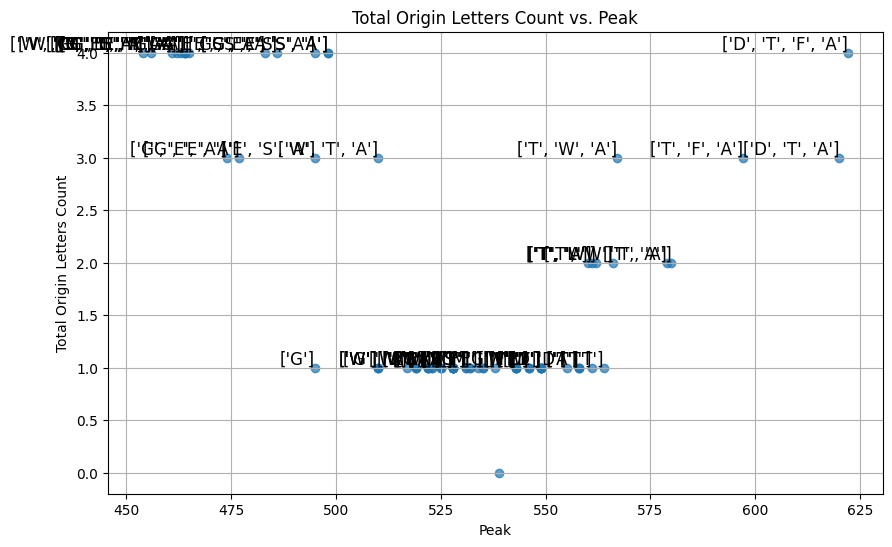

In [ ]:
if df['origin'].isnull().values.any():
    df['origin'] = df['origin'].fillna('')
else:
    df['origin'] = df['origin'].apply(lambda x: ''.join(map(str, x)))

# Luego, puedes contar la longitud de cada cadena y crear una nueva columna
if df['origin'].isnull().values.any():
    print('There are null values in the origin column')
else:
    df['origin_lengths'] = df['origin'].apply(len)

# Ahora puedes graficar 'origin_lengths' en función de 'peak' como se mostró anteriormente

plt.figure(figsize=(10, 6))
plt.scatter(df['peak'], df['origin_lengths'], marker='o', alpha=0.7)

# Agregar etiquetas a cada punto
for i, row in df.iterrows():
    plt.text(row['peak'], row['origin_lengths'], row['origin'], fontsize=12, ha='right', va='bottom')

plt.xlabel('Peak')
plt.ylabel('Total Origin Letters Count')
plt.title('Total Origin Letters Count vs. Peak')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
for i, (letter, counts) in enumerate(df[['origin', 'letter_counts']].values):
    letter_data = df['letter_counts'].apply(lambda x: x.get(letter, 0))
    plt.scatter(df['peak'], letter_data, label=f'Letter: {letter} (Counts: {counts})', alpha=0.7)

plt.xlabel('Peak')
plt.ylabel('Letter Counts')
plt.title('Letter Counts vs. Peak')
plt.legend()
plt.grid(True)
plt.show()



KeyError: "['letter_counts'] not in index"

<Figure size 1200x800 with 0 Axes>

In [ ]:
mutation_origin=[]
for index, value in df_positive.iterrows():
    if(value["name"]!="parent"):
        if(value["m"]>1):
            j=0
            sentence=""
            for i in range(value["m"]):
                sentence+=value["name"][j]
                j+=6
            mutation_origin.append(sentence)
        else:
            mutation_origin.append(value["name"][0])
    else:
        mutation_origin.append(None)

In [ ]:
df_positive["mo"]=mutation_origin

In [ ]:
df_positive

,id,sequence,name,sequence,peak,is_train,m,cat,mo
0,sequence_40826,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,parent,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,539,True,0,1,None
62,sequence_40820,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,W222L,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,1,W
61,sequence_40837,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,F185W,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,1,F
56,sequence_40808,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,V126M,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,1,V
60,sequence_40836,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,F185T,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,1,F
59,sequence_40859,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,I159S,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,543,True,1,1,I
66,sequence_40834,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,P226V,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,546,True,1,1,P
65,sequence_40823,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,P226I,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,546,True,1,1,P
58,sequence_40862,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,L129W,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,546,True,1,1,L
68,sequence_40833,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,D253T,MLMTVFSSAPELALLGSTFAQVDPSNLSVSDSLTYGQFNLVYNAFS...,549,True,1,1,D


In [ ]:
df_positive["mo"].value_counts()

mo
T       6
TA      3
D       2
TW      2
F       2
W       2
L       2
P       2
Y       1
A       1
TL      1
I       1
V       1
TWA     1
TFA     1
DTA     1
DTFA    1
Name: count, dtype: int64

In [ ]:
df_positive.describe()

,peak,m
count,31.000000,31.000000
mean,559.806452,1.451613
std,20.749971,0.850047
min,539.000000,0.000000
25%,546.000000,1.000000
50%,555.000000,1.000000
75%,563.000000,2.000000
max,622.000000,4.000000


In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Mapa de calor de Correlacion Pearson', fontdict={'fontsize':18}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

ValueError: could not convert string to float: 'sequence_40826'

<Figure size 1600x600 with 0 Axes>

In [ ]:
def extract_mutation_info(name):
    # Usamos una expresión regular para capturar las partes de la mutación
    match = re.match(r'([A-Z])(\d+)([A-Z]+)', name)
    if match:
        return match.group(1), int(match.group(2)), match.group(3)
    else:
        return None, None, None

# Aplica la función para extraer información a la columna 'name'
df['origin'], df['position'], df['mutation'] = zip(*df['name'].apply(extract_mutation_info))

# Imprime el DataFrame resultante con la información de las mutaciones
print(df)

In [ ]:
match

NameError: name 'match' is not defined